## Exercise
1. Take a picture of an apple and put it in the image folder in the notebook environment
2. Find the contour of the apple
3. Draw a yellow circle with the center placed on the center of the apple contour
4. Draw a square that precisely holds the apple
5. Take a picture of three seperate apples.
6. Use contours to programmatically identify the number of apples in the photo

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data/apple.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret3, thresh = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
thresh_inverse = cv2.bitwise_not(thresh)
contours, heirarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print("Number of contours: " + str(len(contours)))
c = max(contours, key=cv2.contourArea)
((x, y), radius) = cv2.minEnclosingCircle(c)

cv2.circle(img, center=(int(x), int(y)), radius=int(radius), color=(255, 255, 0), thickness=3)

cv2.drawContours(img, contours, -1 , (255, 0, 0), 3)
plt.imshow(img, interpolation='none')
cv2.imwrite('data/apple_converted.jpg', img)

TypeError: Argument 'thresh' can not be treated as a double

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(480, 852, 3)
(480, 852)


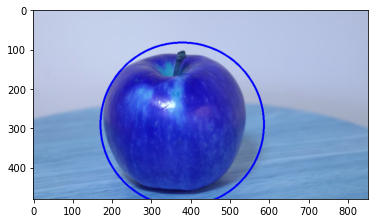

In [7]:
import cv2
import numpy as np

def read(path, switch_channels=True):
    """Read image pixel data from file
    Args:
    path (string): path to image on disk
    switch_channels (bool): if true changes the channels from bgr to rgb (used by matplotlib)"""
    image = cv2.imread(path)
    if switch_channels:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

img_loc = 'data/apple.jpg'
# 1
img = cv2.imread(img_loc, cv2.IMREAD_UNCHANGED)
print(img.shape)
# 2
img_grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(img_grey.shape)
# 3
thresh = 200 # the lower the threshhold the more details we get
ret3, thresh = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
thresh_inverse = cv2.bitwise_not(thresh)

# ret,thresh_img = cv2.threshold(img_grey, thresh, 100, cv2.THRESH_BINARY)
# 4
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#create an empty image for contours
img_contours = np.zeros(img.shape)
# draw the contours on the empty image
cv2.drawContours(img_contours, contours, -1, (255,255,255), 3)

#save image
cv2.imwrite('data/apple_con.jpg',img_contours) 
plt.imshow(img_contours, interpolation='none')

def mark_object(image):
    """find the largest contour in the mask, then use it to compute the minimum enclosing circle and centroid"""
    # Finds contours in a binary image. The contours are a useful tool for shape analysis and object detection and recognition.
#     contours = cv2.con
#     contours = img_contours

    c = max(contours, key=cv2.contourArea)
    ((x, y), radius) = cv2.minEnclosingCircle(c)

    # draw the circle and centroid on the frame,
    # then update the list of tracked points
    cv2.circle(image, center=(int(x), int(y)), radius=int(radius), color=(255, 0, 0), thickness=3)
    return image

img = mark_object(read('data/apple.jpg'))
img_converted = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite('data/apple_contours.jpg', img_converted)
plt.imshow(img_converted)
 